# Real-time Election Results: Portugal 2019 Data Set

### Data Set Information:

#### A data set describing the evolution of results in the Portuguese Parliamentary Elections of October 6th 2019.
#### The data spans a time interval of 4 hours and 25 minutes, in intervals of 5 minutes, concerning the results of the 27 parties involved in the electoral event.
#### The data set is tailored for predictive modelling tasks, mostly focused on numerical forecasting tasks.


In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#import dataset
df=pd.read_csv('ElectionData.csv')

In [3]:
#check the shape
df.shape

(21643, 28)

In [4]:
#check data
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


Attribute Information:

TimeElapsed (Numeric): Time (minutes) passed since the first data acquisition
time (timestamp): Date and time of the data acquisition
territoryName (string): Short name of the location (district or nation-wide)
totalMandates (numeric): MP's elected at the moment
availableMandates (numeric): MP's left to elect at the moment
numParishes (numeric): Total number of parishes in this location
numParishesApproved (numeric): Number of parishes approved in this location
blankVotes (numeric): Number of blank votes
blankVotesPercentage (numeric): Percentage of blank votes
nullVotes (numeric): Number of null votes
nullVotesPercentage (numeric): Percentage of null votes
votersPercentage (numeric): Percentage of voters
subscribedVoters (numeric): Number of subscribed voters in the location
totalVoters (numeric): Percentage of blank votes
pre.blankVotes (numeric): Number of blank votes (previous election)
pre.blankVotesPercentage (numeric): Percentage of blank votes (previous election)
pre.nullVotes (numeric): Number of null votes (previous election)
pre.nullVotesPercentage (numeric): Percentage of null votes (previous election)
pre.votersPercentage (numeric): Percentage of voters (previous election)
pre.subscribedVoters (numeric): Number of subscribed voters in the location (previous election)
pre.totalVoters (numeric): Percentage of blank votes (previous election)
Party (string): Political Party
Mandates (numeric): MP's elected at the moment for the party in a given district
Percentage (numeric): Percentage of votes in a party
validVotesPercentage (numeric): Percentage of valid votes in a party
Votes (numeric): Percentage of party votes
Hondt (numeric): Number of MP's according to the distribution of votes now
FinalMandates (numeric): Target: final number of elected MP's in a district/national-level

In [5]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
TimeElapsed                 21643 non-null int64
time                        21643 non-null object
territoryName               21643 non-null object
totalMandates               21643 non-null int64
availableMandates           21643 non-null int64
numParishes                 21643 non-null int64
numParishesApproved         21643 non-null int64
blankVotes                  21643 non-null int64
blankVotesPercentage        21643 non-null float64
nullVotes                   21643 non-null int64
nullVotesPercentage         21643 non-null float64
votersPercentage            21643 non-null float64
subscribedVoters            21643 non-null int64
totalVoters                 21643 non-null int64
pre.blankVotes              21643 non-null int64
pre.blankVotesPercentage    21643 non-null float64
pre.nullVotes               21643 non-null int64
pre.nullVotesPercentage     21643 non-null float

In [6]:
#check null values
df.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

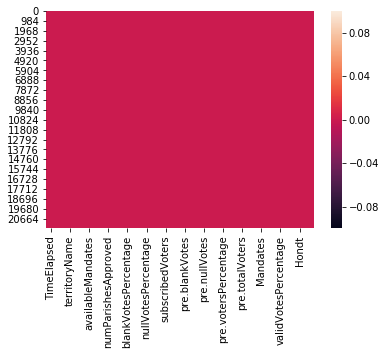

In [7]:
sns.heatmap(df.isnull())

In [8]:
#dataset doesnt contain null values

In [9]:
#check datatypes
df.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

In [10]:
#description
df.describe()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,...,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,133.146052,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,...,1.777442,54.549372,6.378503e+05,3.594932e+05,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138
std,77.651193,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,...,0.388798,4.964948,1.544418e+06,8.763729e+05,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644
min,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,...,1.140000,40.870000,6.383000e+03,3.215000e+03,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000
25%,65.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,...,1.520000,51.210000,1.289260e+05,6.964400e+04,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000
50%,135.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,...,1.690000,56.260000,2.284970e+05,1.102730e+05,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000
75%,200.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,...,1.970000,58.220000,3.933140e+05,2.276200e+05,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000
max,265.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,...,3.120000,62.580000,9.439701e+06,5.380451e+06,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000


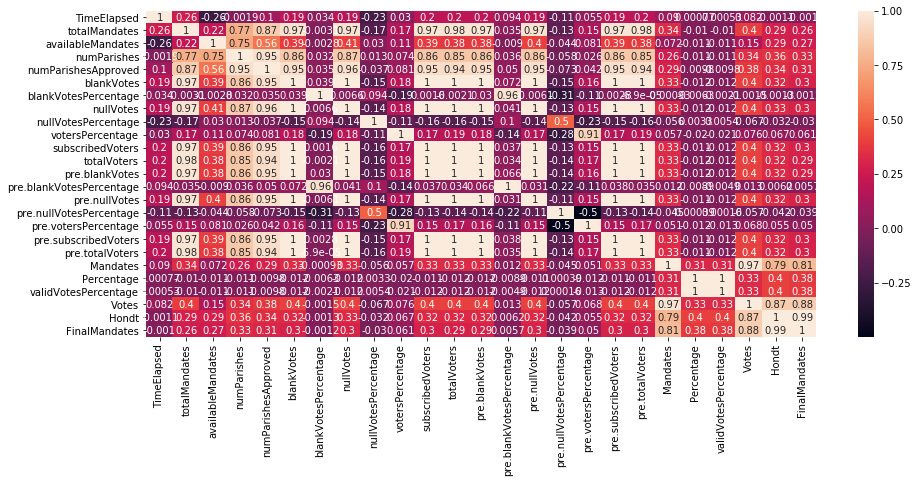

In [11]:
#check corr
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

In [12]:
# Dropping columns from correlation heatmap with ultiple observations of high correlation coefficients(>0.90) to avoid multicollinearity
df.drop(['totalMandates','numParishesApproved','blankVotes','nullVotes','subscribedVoters','totalVoters','pre.blankVotes','pre.nullVotes','pre.subscribedVoters','pre.totalVoters','Percentage','Mandates','pre.blankVotesPercentage','pre.votersPercentage'],axis=1,inplace=True)

In [13]:
df.head()

,TimeElapsed,time,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PS,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PPD/PSD,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,B.E.,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,CDS-PP,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PCP-PEV,4.83,17757,11,12


In [14]:
#lets analyze column
df['territoryName'].value_counts()

Território Nacional    1134
Porto                  1134
Braga                  1134
Leiria                 1134
Viana do Castelo       1080
Madeira                1080
Lisboa                 1080
Aveiro                 1080
Setúbal                1080
Coimbra                1080
Viseu                  1080
Guarda                 1026
Évora                  1026
Santarém               1026
Faro                   1026
Castelo Branco          972
Bragança                972
Portalegre              918
Beja                    918
Vila Real               864
Açores                  799
Name: territoryName, dtype: int64

In [15]:
#lets analyze column
df['FinalMandates'].value_counts()

0      17823
1       1134
2        695
3        641
4        378
5        270
8        108
12       108
7         54
6         54
77        54
20        54
19        54
9         54
106       54
17        54
15        54
Name: FinalMandates, dtype: int64

In [16]:
#lets analyze column
df['Party'].value_counts()

PS           1127
PCP-PEV      1127
IL           1127
PPD/PSD      1127
PNR          1127
PCTP/MRPP    1127
CH           1127
L            1127
B.E.         1127
PDR          1127
A            1127
PAN          1127
CDS-PP       1127
PPM          1073
R.I.R.       1026
PTP          1019
MPT          1019
PURP          972
NC            972
JPP           486
MAS           425
Name: Party, dtype: int64

# EDA

In [17]:
#numerical columns
numerical_variables=[features for features in df.columns if df[features].dtypes!='O']
numerical_variables.remove('FinalMandates')
numerical_variables

['TimeElapsed',
 'availableMandates',
 'numParishes',
 'blankVotesPercentage',
 'nullVotesPercentage',
 'votersPercentage',
 'pre.nullVotesPercentage',
 'validVotesPercentage',
 'Votes',
 'Hondt']

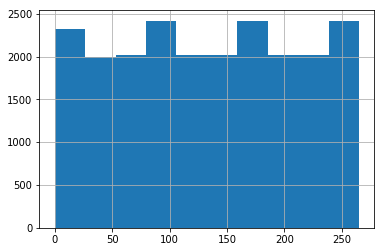

In [18]:
df['TimeElapsed'].hist()

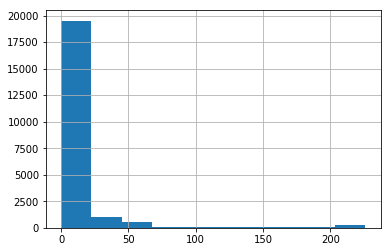

In [19]:
df['availableMandates'].hist()

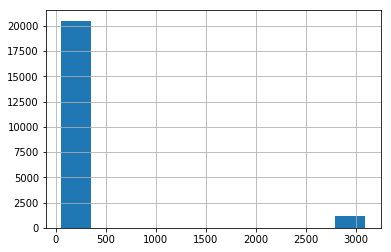

In [20]:
df['numParishes'].hist()

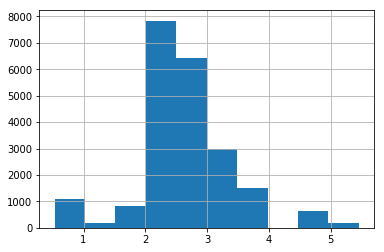

In [21]:
df['blankVotesPercentage'].hist()

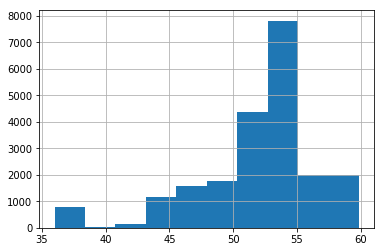

In [22]:
df['votersPercentage'].hist()

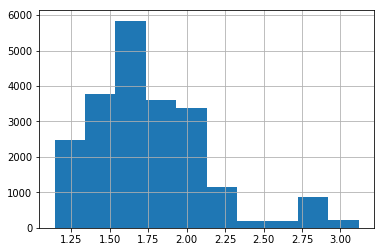

In [23]:
df['pre.nullVotesPercentage'].hist()

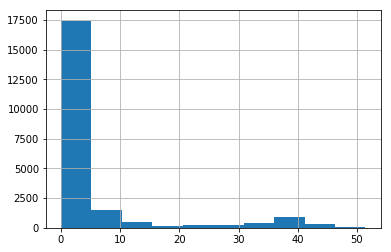

In [24]:
df['validVotesPercentage'].hist()

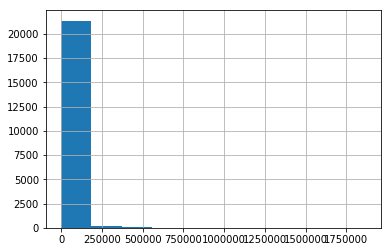

In [25]:
df['Votes'].hist()

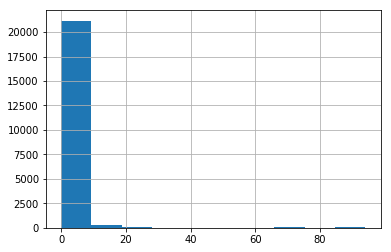

In [26]:
df['Hondt'].hist()

Inference about distribution of variables:- Normal Distribution:-

blankVotesPercentage
nullVotesPercentage
pre.nullVotesPercentage
Skewed Normal Distribution:-

votersPercentage skewed to the right
Exponential distribution:-

AvailableMandates
validVotesPercentage
Votes
Hondt
Non-conclusive Distribution:-

TimeElapsed
NumParishes
Therefore since all the variables are not normally distributed, normalization is required for regression

In [27]:
# PMF distribution

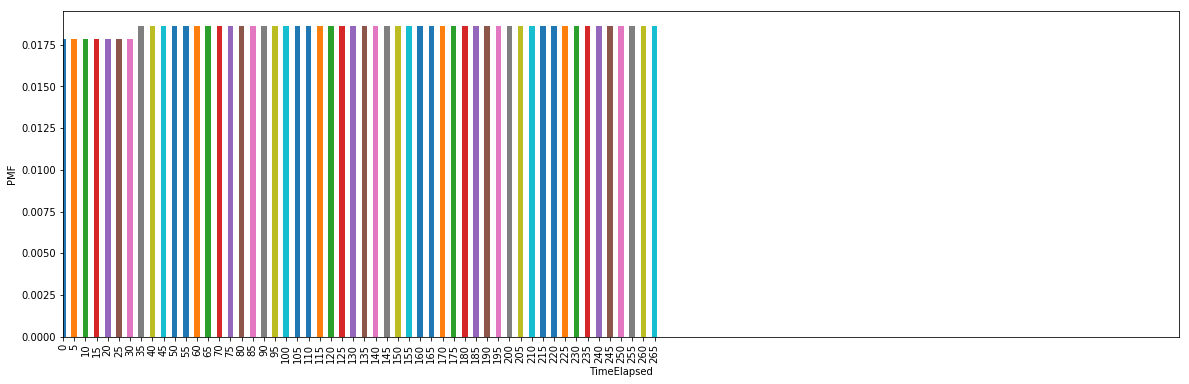

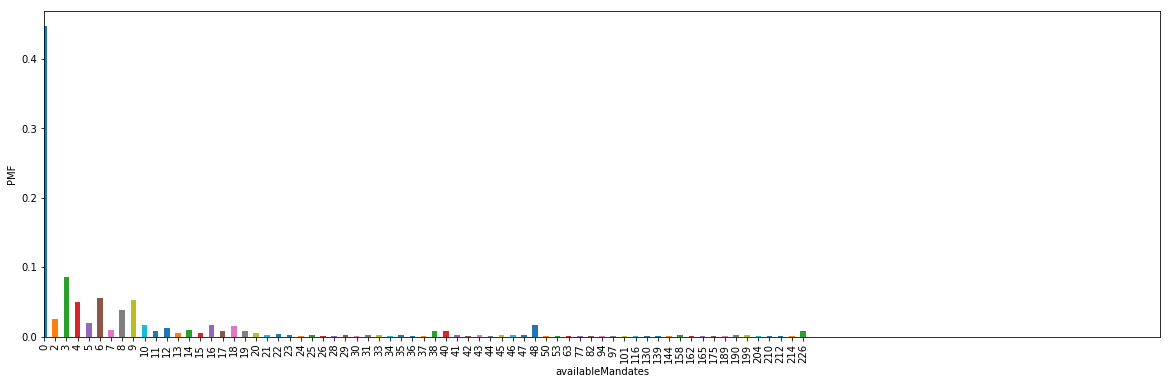

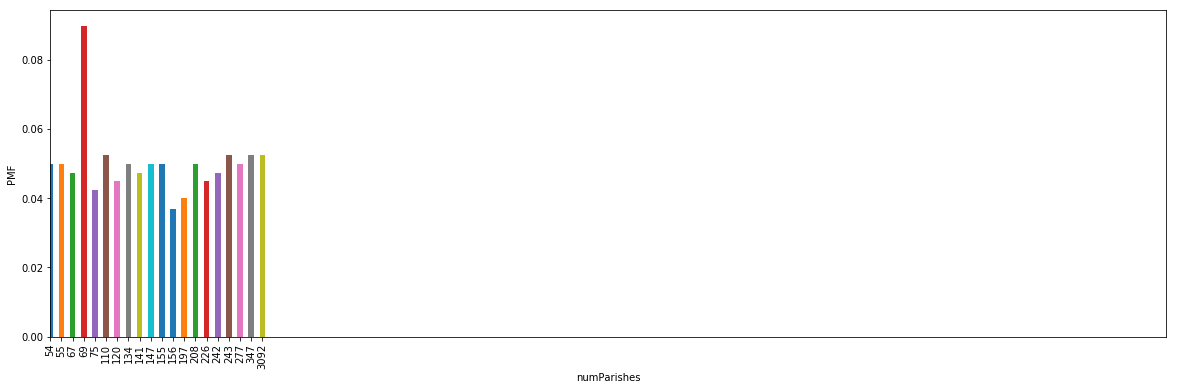

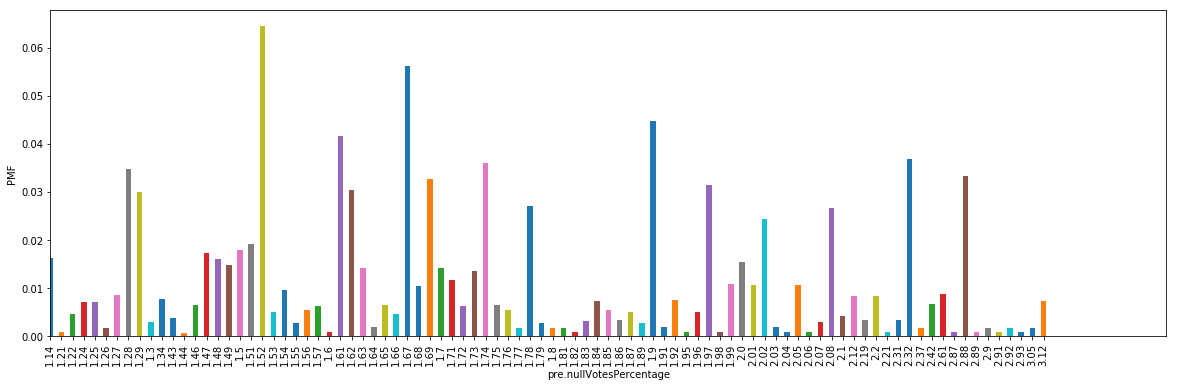

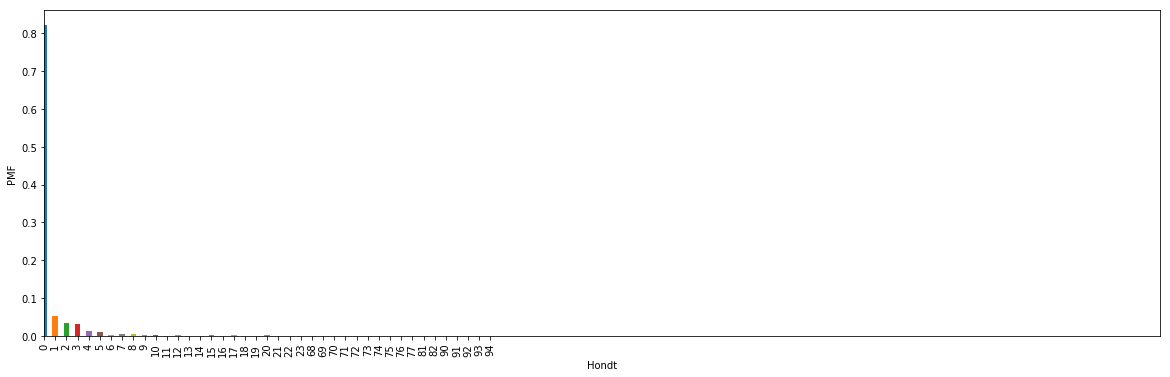

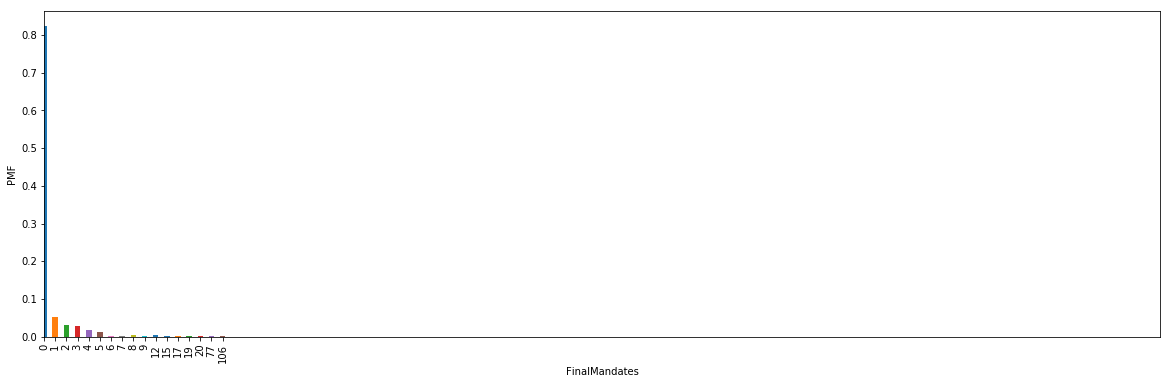

In [28]:
# plot the probability of the occurence of unique values when picked up randomly
def pmf_func(dataset,lists):
    for i in lists:
        pmf = dataset[i].value_counts().sort_index() / len(dataset[i])
        plt.figure(figsize = (20,6))
        pmf.plot(kind='bar')
        plt.xlabel(i)
        plt.ylabel('PMF')
        plt.xlim(0,100)
few_unique=['TimeElapsed','availableMandates','numParishes','pre.nullVotesPercentage','Hondt','FinalMandates']        
pmf_func(df,few_unique)

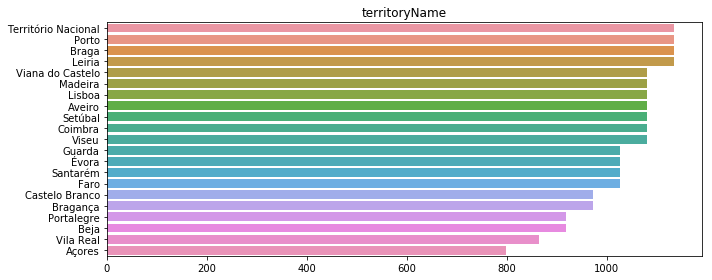

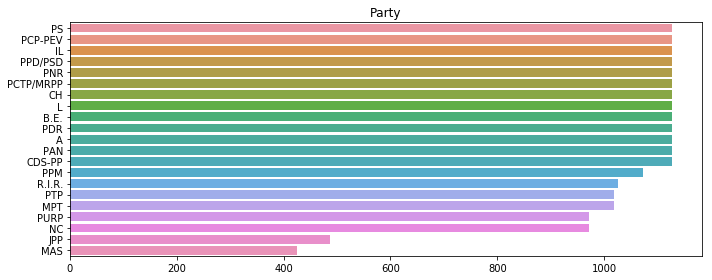

In [29]:
categorcial_variables = ['territoryName','Party']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    #plt.hist(col, normed=True, cumulative=True, label='CDF',histtype='step', alpha=0.8, color='k')
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

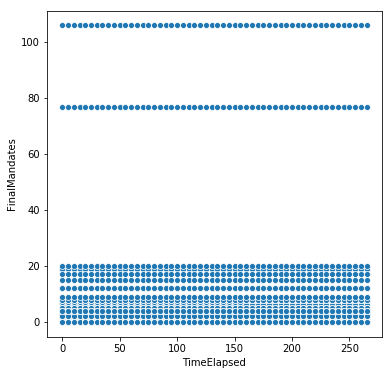

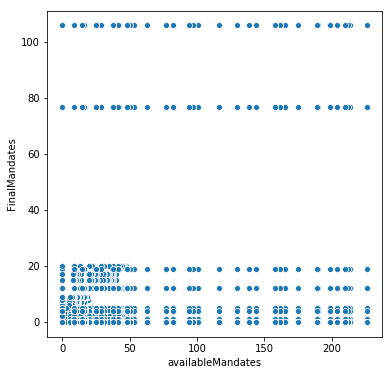

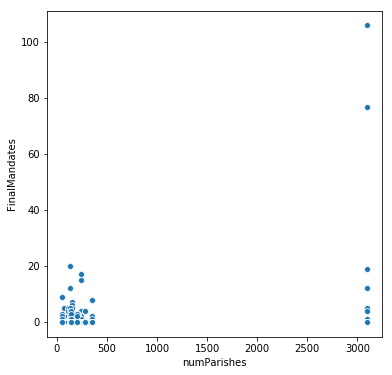

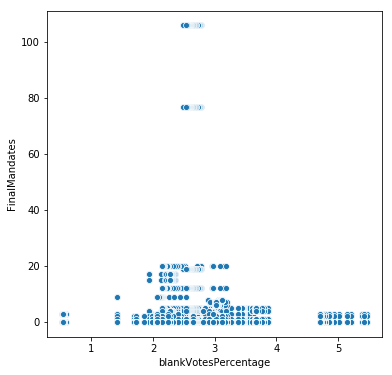

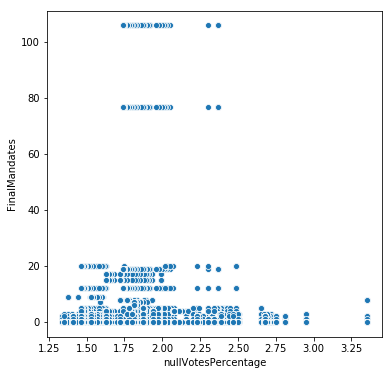

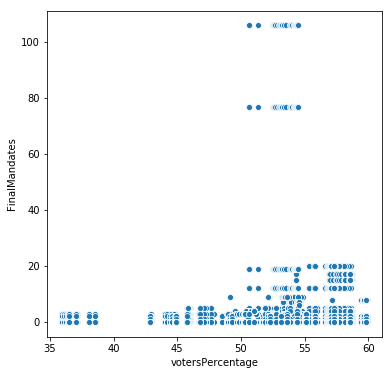

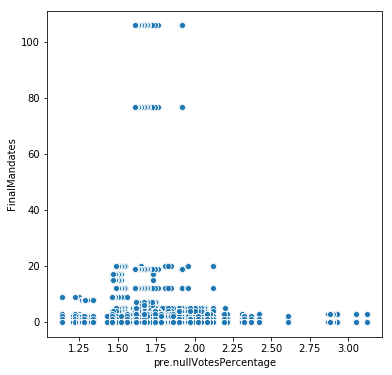

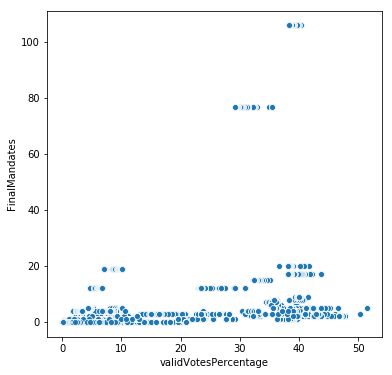

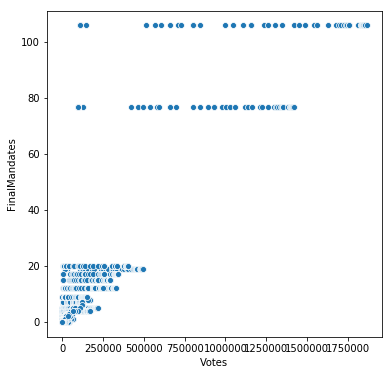

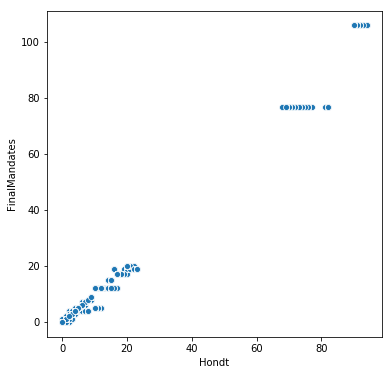

In [30]:
def scatter_func(dataset,lists):
    for i in lists:
        plt.figure(figsize = (6,6))
        sns.scatterplot(x=dataset[i],y=dataset['FinalMandates'],data=dataset)
        plt.xlabel(i)
        plt.ylabel('FinalMandates')
scatter_func(df,numerical_variables)

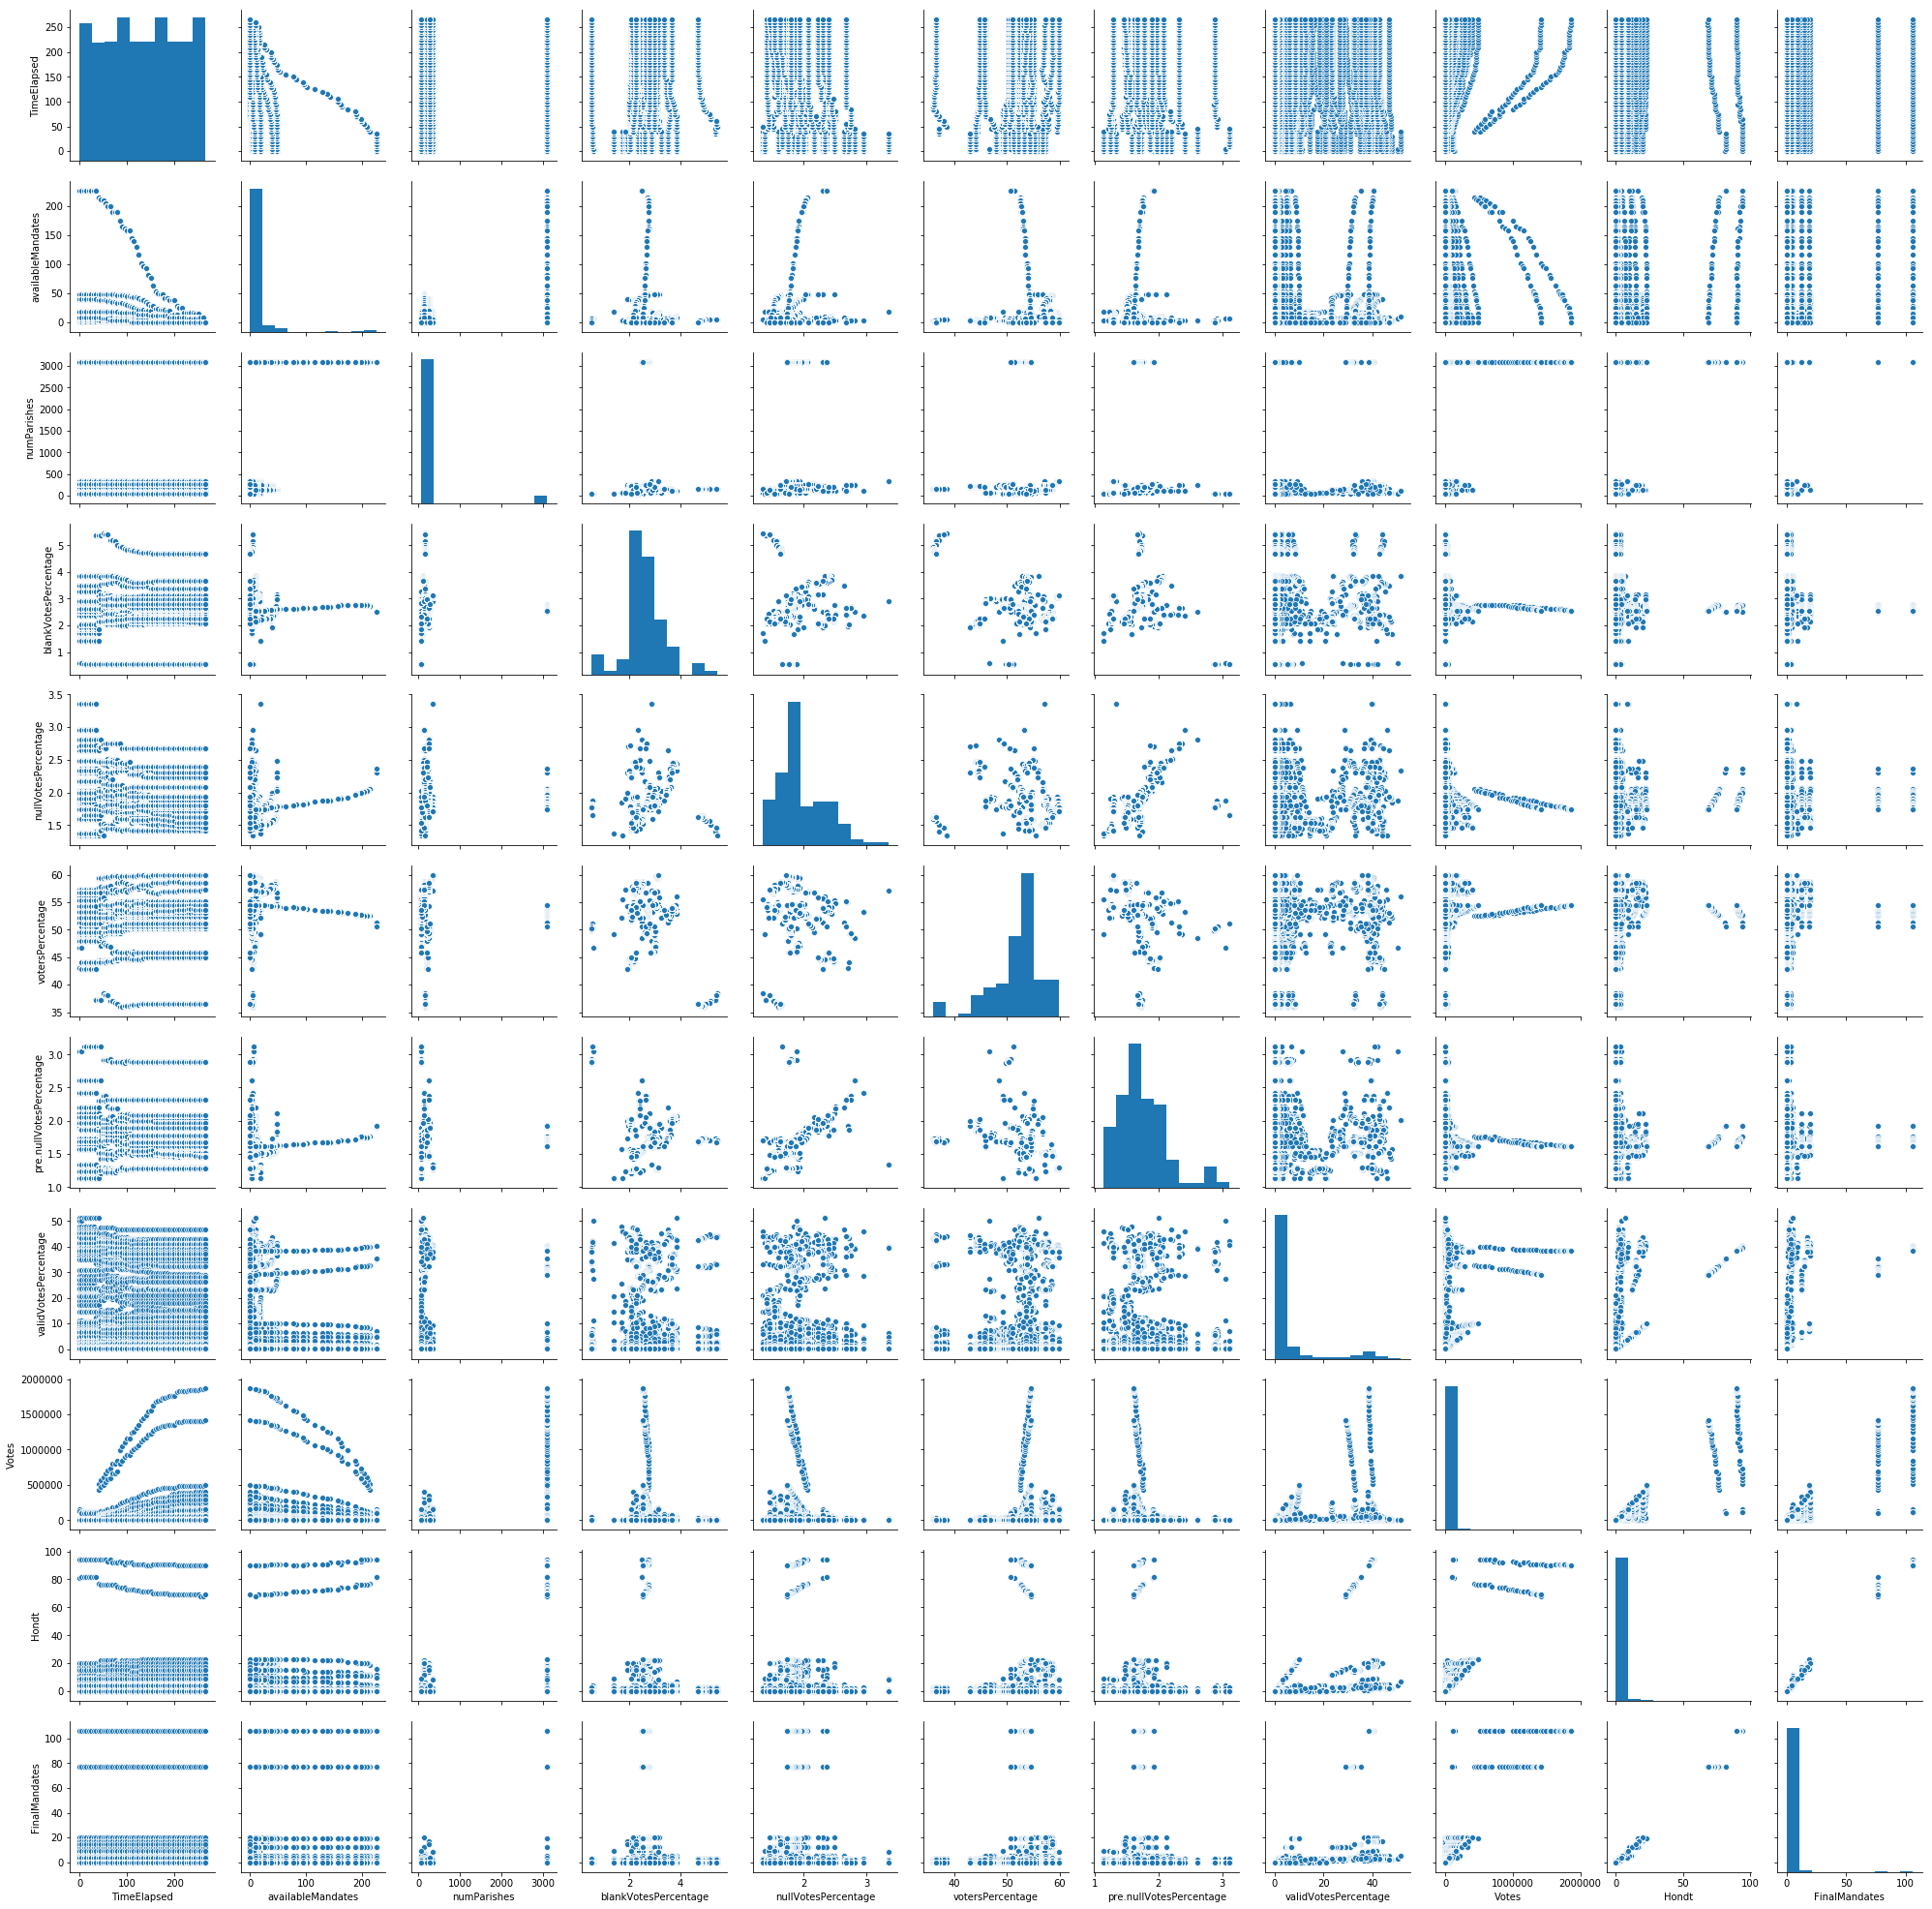

In [31]:
sns.pairplot(data=df)

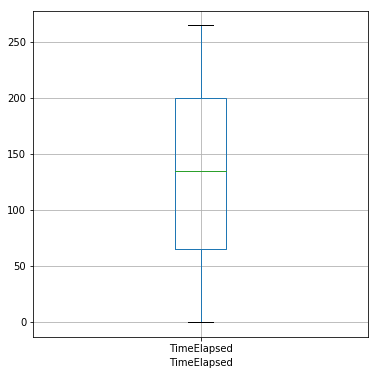

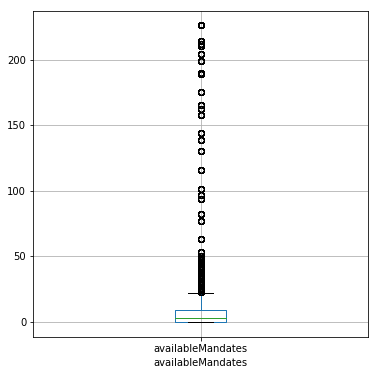

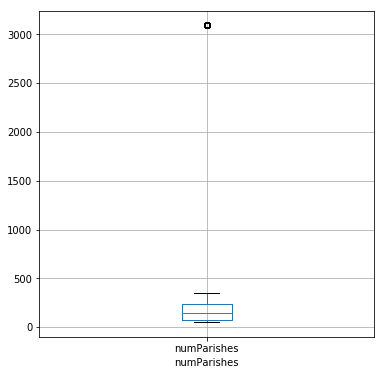

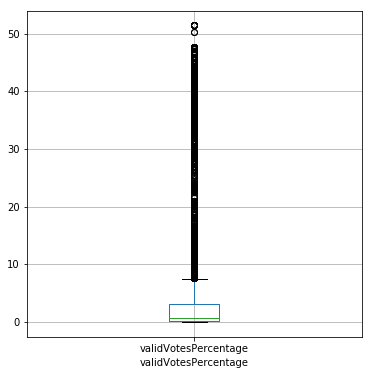

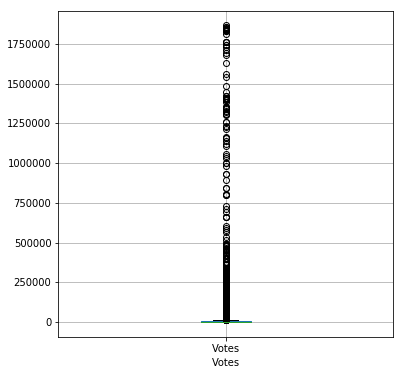

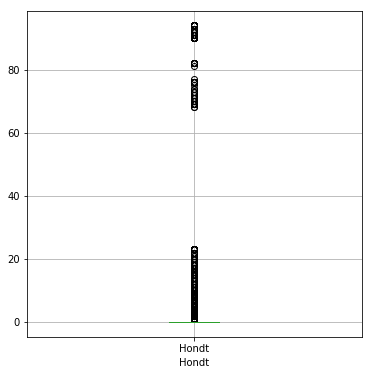

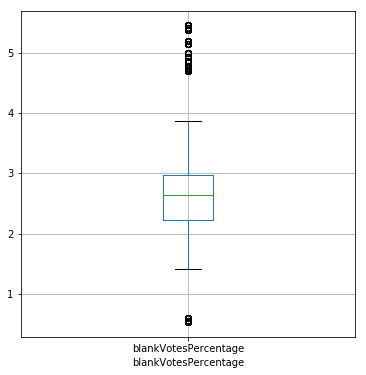

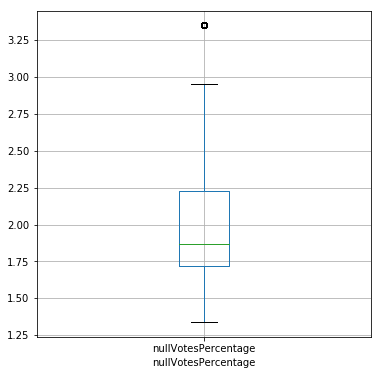

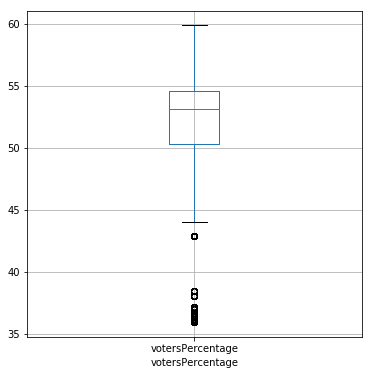

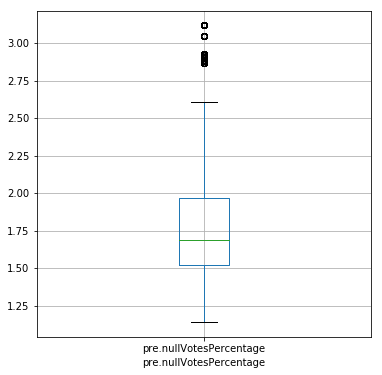

In [32]:
# boxplot to get a better understanding of outliers
def box_func(dataset,lists):
    for i in lists:
        plt.figure(figsize = (6,6))
        dataset.boxplot(column=[i])
        plt.xlabel(i)
lis=['TimeElapsed','availableMandates','numParishes','validVotesPercentage','Votes','Hondt','blankVotesPercentage','nullVotesPercentage','votersPercentage','pre.nullVotesPercentage']
box_func(df,lis)
#df.boxplot(column = ['TimeElapsed','availableMandates','numParishes','validVotesPercentage','Votes','Hondt','blankVotesPercentage','nullVotesPercentage','votersPercentage','pre.nullVotesPercentage'])

In [33]:
df['Dates'] = pd.to_datetime(df['time']).dt.date
df['Time'] = pd.to_datetime(df['time']).dt.time

In [34]:
df.drop(['time'],axis=1,inplace=True)

In [35]:
df.head(2)

,TimeElapsed,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,FinalMandates,Dates,Time
0,0,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PS,40.22,147993,94,106,2019-10-06,20:10:02
1,0,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PPD/PSD,34.95,128624,81,77,2019-10-06,20:10:02


In [36]:
# Encoding date as an ordinal variable with the more recent data as having a higher order
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Dates_encoded']=pd.DataFrame(le.fit_transform(df.Dates))
df['Time_encoded']=pd.DataFrame(le.fit_transform(df.Time))
df['territoryName_encoded']=pd.DataFrame(le.fit_transform(df.territoryName))

In [37]:
df.head(2)

,TimeElapsed,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,FinalMandates,Dates,Time,Dates_encoded,Time_encoded,territoryName_encoded
0,0,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PS,40.22,147993,94,106,2019-10-06,20:10:02,0,8,16
1,0,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PPD/PSD,34.95,128624,81,77,2019-10-06,20:10:02,0,8,16


In [38]:
df.drop(['Time','territoryName','Dates'],axis=1,inplace=True)

In [39]:
# Mean encoding for nominal variable Party
party_mean_encoded=pd.Series(df['Party'].value_counts())/len(df['Party'])
x=party_mean_encoded.to_dict()
df['Party_encoded']=df['Party'].map(x)
df.head()

,TimeElapsed,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,FinalMandates,Dates_encoded,Time_encoded,territoryName_encoded,Party_encoded
0,0,226,3092,2.5,2.3,51.36,1.91,PS,40.22,147993,94,106,0,8,16,0.052072
1,0,226,3092,2.5,2.3,51.36,1.91,PPD/PSD,34.95,128624,81,77,0,8,16,0.052072
2,0,226,3092,2.5,2.3,51.36,1.91,B.E.,7.15,26307,16,19,0,8,16,0.052072
3,0,226,3092,2.5,2.3,51.36,1.91,CDS-PP,5.14,18923,12,5,0,8,16,0.052072
4,0,226,3092,2.5,2.3,51.36,1.91,PCP-PEV,4.83,17757,11,12,0,8,16,0.052072


In [40]:
df.drop(['Party'],axis=1,inplace=True)
df.head()

,TimeElapsed,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,validVotesPercentage,Votes,Hondt,FinalMandates,Dates_encoded,Time_encoded,territoryName_encoded,Party_encoded
0,0,226,3092,2.5,2.3,51.36,1.91,40.22,147993,94,106,0,8,16,0.052072
1,0,226,3092,2.5,2.3,51.36,1.91,34.95,128624,81,77,0,8,16,0.052072
2,0,226,3092,2.5,2.3,51.36,1.91,7.15,26307,16,19,0,8,16,0.052072
3,0,226,3092,2.5,2.3,51.36,1.91,5.14,18923,12,5,0,8,16,0.052072
4,0,226,3092,2.5,2.3,51.36,1.91,4.83,17757,11,12,0,8,16,0.052072


In [41]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop('FinalMandates',axis=1))
scaled_features=scaler.transform(df.drop('FinalMandates',axis=1))
dataset_scaled=pd.DataFrame(scaled_features,columns=df.columns[:-1])
dataset_scaled.head()

,TimeElapsed,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,validVotesPercentage,Votes,Hondt,FinalMandates,Dates_encoded,Time_encoded,territoryName_encoded
0,-1.714708,6.758472,4.221354,-0.152941,0.902163,-0.128489,0.340951,3.217832,1.419284,14.757327,-0.418374,-1.192483,0.982968,0.430888
1,-1.714708,6.758472,4.221354,-0.152941,0.902163,-0.128489,0.340951,2.733495,1.211248,12.691673,-0.418374,-1.192483,0.982968,0.430888
2,-1.714708,6.758472,4.221354,-0.152941,0.902163,-0.128489,0.340951,0.178549,0.112293,2.363404,-0.418374,-1.192483,0.982968,0.430888
3,-1.714708,6.758472,4.221354,-0.152941,0.902163,-0.128489,0.340951,-0.006179,0.032984,1.727818,-0.418374,-1.192483,0.982968,0.430888
4,-1.714708,6.758472,4.221354,-0.152941,0.902163,-0.128489,0.340951,-0.034669,0.020460,1.568922,-0.418374,-1.192483,0.982968,0.430888


In [42]:
#split the data
x=df.drop(['FinalMandates'],axis=1)    #independent columns
y=df['FinalMandates'] 

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
def max_r2_score(clf,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print(clf,"max r2 score corresponding to ",final_r_state," is ",max_r_score)

In [44]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC

# Import ensemble machine learning library
from sklearn.ensemble import RandomForestRegressor
model=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]
for m in model:
    max_r2_score(m,x,y)
    
    


LinearRegression() max r2 score corresponding to  61  is  0.9936790718499452
DecisionTreeRegressor() max r2 score corresponding to  57  is  0.999981166347397
RandomForestRegressor() max r2 score corresponding to  84  is  0.9999653904557148


In [45]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 84,test_size=0.20)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print('r2_score',r2_score(y_train, regressor.predict(x_train)))
rf_accuracy = round(regressor.score(x_train,y_train),2)
print('rf_accuracy:',rf_accuracy)

r2_score 0.9999755401570052
rf_accuracy: 1.0


In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, x_train, y_train, cv=5, scoring='r2')
print(np.sqrt(np.abs(cv_score)))

[0.99986695 0.99992047 0.99995268 0.99974379 0.99996274]


In [47]:
#Lets find the rmse and r2_score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  0.04623597980177465
r2_score is:  0.9999642885404344


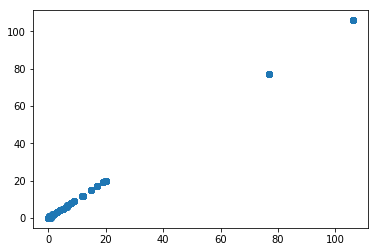

In [48]:
plt.scatter(y_pred,y_test)

In [49]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
3754,0,0.0
16769,0,0.0
5032,0,0.0
10660,0,0.0
12302,1,1.0


In [50]:
#Lets save this model using joblib
#Lets save the above model
from joblib import dump, load
dump(regressor, 'election.joblib') 


['election.joblib']